In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import os
import PIL.Image as Image
from typing import Tuple
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import cv2
from LookGenerator.datasets.utils import prepare_image_for_segmentation, load_image, load_image_for_test
import LookGenerator.datasets.transforms as custom_transforms
from tqdm import tqdm


In [17]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\valData\image\00013_00.jpg")


In [18]:
transform_input = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

transform_output = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])
model = UNet(in_channels=3, out_channels = 1, features=(32, 64, 128, 256))


In [19]:
img_to_model = prepare_image_for_segmentation(image, transform_input)

In [20]:
model = load_model(model,
                       r"C:\Users\DenisovDmitrii\OneDrive - ITMO UNIVERSITY\peopleDetector\segmetationBackground\weights\testResultsFeatures_32_64_128_256\epoch_29.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [21]:
modelled = model(img_to_model)


torch.Size([1, 1, 256, 192])
torch.Size([1, 3, 256, 192])


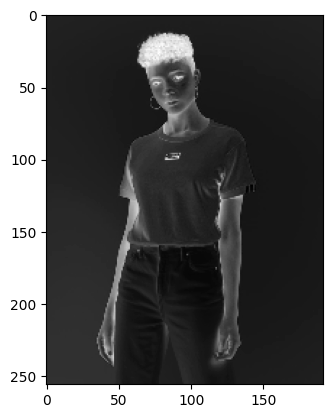

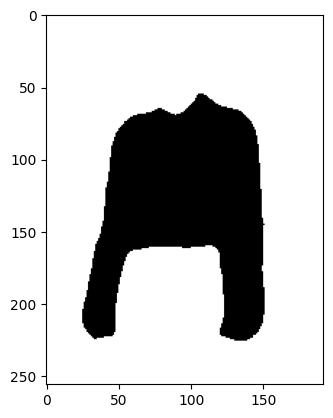

In [22]:
print(modelled.shape)
print(img_to_model.shape)
plt.imshow((img_to_model.detach().numpy()[0,0,:,:]), cmap = 'binary')
plt.show()
modelled_img = transform_output(modelled.detach()).detach().numpy()[0, 0, :, :]

plt.imshow(modelled_img,cmap = 'binary')
plt.show()

In [ ]:
url = r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session31'
list_files = os.listdir(url)
for file in list_files:
    model = load_model(model, url + "\\" + file)
    seg = model(img_to_model)

    seg = to_array_from_model_bin(transform_output(seg.detach()))
    plt.imshow(seg, cmap = 'binary')
    plt.show()

In [ ]:
list_files

In [31]:
test_dir = r"C:\Users\DenisovDmitrii\OneDrive - ITMO UNIVERSITY\peopleDetector\segmentation\bigData"
test_folder = "\\image\\"
save_masks_dir = "C:\\Users\\DenisovDmitrii\\OneDrive - ITMO UNIVERSITY\\peopleDetector\\segmentation\\bigData\\epoch28\\"
list_files = os.listdir(test_dir + test_folder)
images = [file.split('.')[0] for file in list_files]

In [32]:
model.to(device)
for image in tqdm(images):
    #print(image)
    img = load_image_for_test(test_dir, test_folder, image, '.jpg')
    img_to_model = prepare_image_for_model(img, transform_input)
    modelled = model(img_to_model.to(device))
    mask = to_array_from_model_bin(transform_output(modelled.to('cpu').detach()))
    # plt.figure(figsize=(18, 6))
    # plt.subplot(1, 2, 1)
    # plt.imshow(img, cmap='BrBG')
    # plt.subplot(1, 2, 2)
    # plt.imshow(mask, cmap='binary')
    # plt.show()
    Image.fromarray(np.uint8(mask * 255), 'L').save(save_masks_dir + image + '.png')


100%|██████████| 11647/11647 [03:51<00:00, 50.41it/s]
